<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


***


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [3]:
# function to plot the confusion matrix.
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']);ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe


Load the data


In [4]:
# If you were unable to complete the previous labs correctly you can uncomment and load this csv
# data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')
# X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')

In [5]:
# Read Data from Csv file
data = pd.read_csv("dataset_part_2.csv")
data.head(1)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0


In [6]:
# Read X from Csv file
X = pd.read_csv('dataset_part_3.csv')
X.head(1)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [7]:
# Create a NumPy array from "Class" column
Y = data['Class'].to_numpy()
#print("Y:", Y)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [8]:
# Standardize the data in X then reassign it to the variable X using transform
X = preprocessing.StandardScaler().fit(X).transform(X)
#print("X:", X[0])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [9]:
# Split the Data X and Y into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=2)

#print ('Traing set:', X_train.shape, Y_train.shape)
#print ('Testing set:', X_test.shape, Y_test.shape)

we can see we only have 18 test samples.


In [10]:
# Number of test samples
Y_test.shape

(18,)

## TASK  4: Logistic Regression


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [11]:
# Parameters provided for logistic regression
parameters = {'C':[0.01,0.1,1],
                'penalty':['l2'],
                'solver':['lbfgs']}

In [12]:
#Create a logistic regression object 
lr = LogisticRegression()

# Create a GridSearchCV object with cv = 10
grid_search = GridSearchCV(lr, parameters, cv=10)

# Fit the object to find the best parameters
lr_cv = grid_search.fit(X_train, Y_train)

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [13]:
# Find the Best Parameters for lr
print("Logistic Regression (lr):")
print("Tuned Hpyerparameters: ", lr_cv.best_params_)
print("Accuracy: ", lr_cv.best_score_)

Logistic Regression (lr):
Tuned Hpyerparameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy:  0.8464285714285713


## TASK  5: Logistic Regression

Calculate the accuracy on the test data using the method <code>score</code>:


In [14]:
# Calculate the accuracy of the lr on the test data
lr_score = lr_cv.score(X_test, Y_test)
print("lr Score: ", lr_score)

lr Score:  0.8333333333333334


Lets look at the confusion matrix:


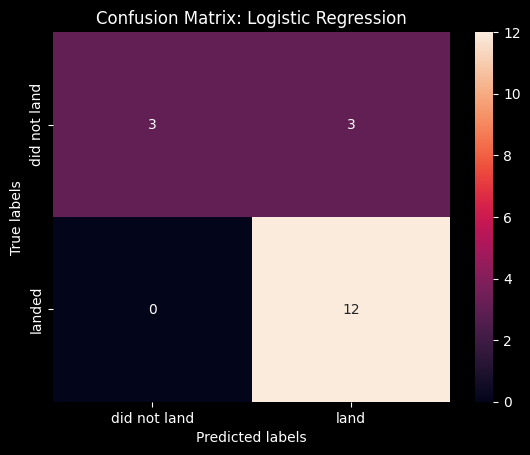

In [15]:
# Plot the Logistic Regression confusion matrix
yhat = lr_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
plt.title("Confusion Matrix: Logistic Regression")

#Save the confusion matrix to a file
plt.savefig("Logistic_Regression_Confusion_Matrix.png")

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6: Support Vector Machine

Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [16]:
# Parameters provided for Support Vector Machine
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
                'C': np.logspace(-3, 3, 5),
                'gamma':np.logspace(-3, 3, 5)}

In [17]:
# Create a Support Vector Machine Object
svm = SVC()

# Create a GridSearchCV object with cv = 10. 
grid_search = GridSearchCV(svm, parameters, cv=10)

# Fit the object to find the best parameters
svm_cv = grid_search.fit(X_train, Y_train)

In [18]:
# Find the Best Parameters for svm
print("Support Vector Machine (svm):")
print("Tuned hpyerparameters: ",svm_cv.best_params_)
print("Accuracy:",svm_cv.best_score_)

Support Vector Machine (svm):
Tuned hpyerparameters:  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy: 0.8482142857142856


## TASK  7:  Support Vector Machine


Calculate the accuracy on the test data using the method <code>score</code>:


In [19]:
# Calculate the accuracy of the svm on the test data
svm_score = svm_cv.score(X_test, Y_test)
print("svm Score: ", svm_score)

svm Score:  0.8333333333333334


We can plot the confusion matrix


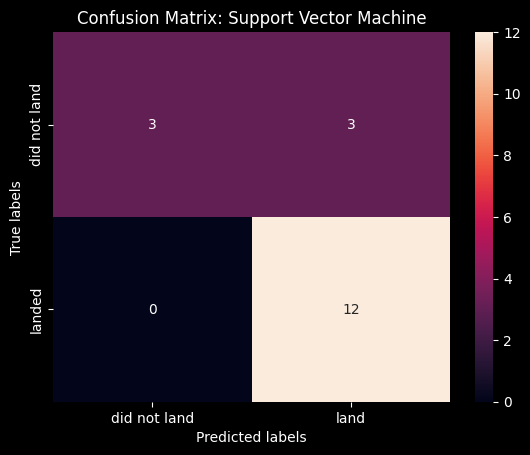

In [20]:
# Plot the Support Vector Machine confusion matrix
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
plt.title("Confusion Matrix: Support Vector Machine")

# Save the confusion matrix to a file
plt.savefig("Support_Vector_Machine_Confusion_Matrix.png")

## TASK  8: Decision Tree


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
# Parameters provided for Decision Tree Classifier
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [22]:
# Create a Decision Tree Classifier Object
dt = DecisionTreeClassifier()

# Create a GridSearchCV object with cv = 10. 
grid_search = GridSearchCV(dt, parameters, cv=10)

# Fit the object to find the best parameters
dt_cv = grid_search.fit(X_train, Y_train)

c:\Users\SummerRay\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\SummerRay\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\SummerRay\miniconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\SummerRay\miniconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\SummerRa

In [23]:
# Find the Best Parameters for dt
print("Decision Tree (dt):")
print("tuned hpyerparameters:",dt_cv.best_params_)
print("accuracy:",dt_cv.best_score_)

Decision Tree (dt):
tuned hpyerparameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy: 0.8607142857142858


## TASK  9: Decision Tree


Calculate the accuracy of dt_cv on the test data using the method <code>score</code>:


In [24]:
# Calculate the accuracy of the dt on the test data 
dt_score = dt_cv.score(X_test, Y_test)
print("dt Score: ", dt_score)

dt Score:  0.8333333333333334


We can plot the confusion matrix


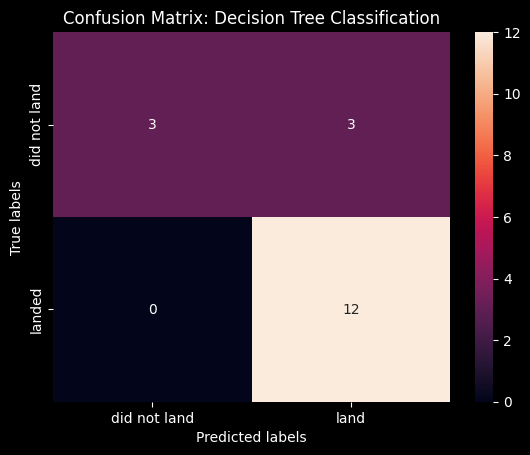

In [25]:
# Plot the Decision Tree Classification confusion matrix
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
plt.title("Confusion Matrix: Decision Tree Classification")

#Save the confusion matrix to a file
plt.savefig("Decision_Tree_Classification_Confusion_Matrix.png")

## TASK  10: K-Nearest Neighbors

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [26]:
# Parameters provided for K-Nearest Neighbors
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'p': [1,2]}

In [27]:
# Create a K-Nearest Neighbors Object
knn = KNeighborsClassifier()

# Create a GridSearchCV object with cv = 10
grid_search = GridSearchCV(knn, parameters, cv=10)

# Fit the object to find the best parameters
knn_cv = grid_search.fit(X_train, Y_train)

In [28]:
# Find the Best Parameters for knn
print("K-Nearest Neighbors (knn):")
print("tuned hpyerparameters:",knn_cv.best_params_)
print("accuracy:",knn_cv.best_score_)

K-Nearest Neighbors (knn):
tuned hpyerparameters: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy: 0.8482142857142858


## TASK  11: K-Nearest Neighbors

Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [29]:
# Calculate the accuracy of knn on the test data
knn_score = knn_cv.score(X_test, Y_test)
knn_score

0.8333333333333334

We can plot the confusion matrix


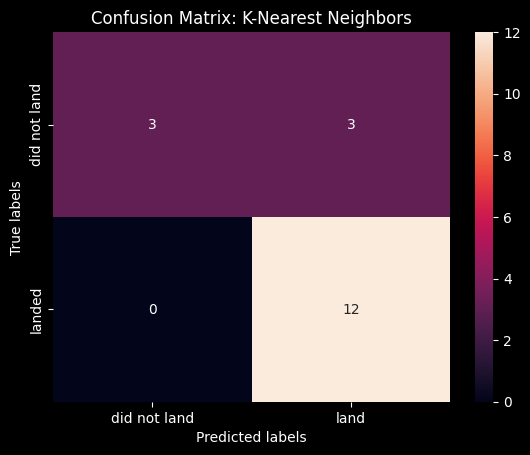

In [30]:
# Plot the K-Nearest Neighbors confusion matrix
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
plt.title("Confusion Matrix: K-Nearest Neighbors")

#Save the confusion matrix to a file
plt.savefig("K-Nearest_Neighbors_Confusion_Matrix.png")

## TASK  12


Find the method performs best:


In [32]:
# Find which methods preforms best 
print('  Method                        % Accuracy')
print('Logistics Regression (lr):   ', lr_score)
print('Support Vector Machine (svm):', svm_score)
print('Decision Tree (dt):          ', dt_score)
print('K-Nearest Neighbors (knn):   ', knn_score)

scores = [["Logistics Regression (lr)",lr_score], 
            ["Support Vector Machine (svm)",svm_score],
            ["Decision Tree (dt)", dt_score],
            ["K-Nearest Neighbors (knn)",knn_score]]

print("\n", (max(scores)) ," has a slight but not statistically significant edge.")

  Method                        % Accuracy
Logistics Regression (lr):    0.8333333333333334
Support Vector Machine (svm): 0.8333333333333334
Decision Tree (dt):           0.8333333333333334
K-Nearest Neighbors (knn):    0.8333333333333334

 ['Support Vector Machine (svm)', 0.8333333333333334]  has a slight but not statistically significant edge.


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-08-31        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |


Copyright © 2020 IBM Corporation. All rights reserved.
